In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import random
from joblib import dump
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read data
def load_data():
    data = pd.read_excel('E:/Documents/Semester 8/TAmbun/Sidang/K-Means++/Ganjar/datasetganjar.xlsx')
    return data

In [3]:
data = load_data()
df = data
df

,USER,comment
0,cucihel83,partai mencret la kuning kuning😁
1,farellabdjull,2024 no Banteng merah#tolakganjarjadipresiden 🔥
2,lalapooh007,2024 Anti Redbull 🔥
3,tenggelamkankardun,Relawan ganjar pati siap menangkan ganjar pres...
4,er.win1192,Itu kode dakjal. Anies keren 👍👍👍
...,...,...
207549,emha_an44,Alhamdulillah guru honorer dapet THR banyak ba...
207550,ayuamalenia,@citraclarisaa Oh iya sis minggu lalu juga say...
207551,myeshamayasri,@citraclarisaa Saya kemarin order di @goals_sl...
207552,ujangerusp0,Assalamualaikum wr wb\nSebelum nya saya minta ...


### Data Cleaning

In [4]:
# Drop attribut
df = df.drop('USER', axis=1)
df.head()

,comment
0,partai mencret la kuning kuning😁
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥
2,2024 Anti Redbull 🔥
3,Relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍


In [5]:
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

# Change the 'comment' column to string data type
df['comment'] = df['comment'].astype(str)

# Applying the remove_pattern function on the 'comment' column and saving the result to the 'clean_comment' column
df['comment_cl1'] = np.vectorize(remove_pattern)(df['comment'], " *RT* | *@[\w]*")

# Returns the top few rows of the DataFrame
df.head()

,comment,comment_cl1
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning😁
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah#tolakganjarjadipresiden 🔥
2,2024 Anti Redbull 🔥,2024 Anti Redbull 🔥
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal. Anies keren 👍👍👍


In [6]:
# remove simbol/character
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text
df['comment_cl2'] = df['comment_cl1'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning😁,partai mencret la kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull 🔥,2024 Anti Redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren


In [7]:
# remove
def remove(tweet):
    #remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    #remove hastags, only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    return tweet
df['comment_cl3'] = df['comment_cl2'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2,comment_cl3
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren


### Teks Preprocessing

##### Lowercasing

In [8]:
# lowercasing
df.drop(["comment_cl1"], axis=1, inplace=True) 

df['Text_lower'] = df['comment_cl3'].str.lower()
df

,comment,comment_cl2,comment_cl3,Text_lower
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren
...,...,...,...,...
207549,Alhamdulillah guru honorer dapet THR banyak ba...,Alhamdulillah guru honorer dapet THbanyak banget,Alhamdulillah guru honorer dapet THbanyak banget,alhamdulillah guru honorer dapet thbanyak banget
207550,@citraclarisaa Oh iya sis minggu lalu juga say...,Oh iya sis minggu lalu juga saya order di kema...,Oh iya sis minggu lalu juga saya order di kema...,oh iya sis minggu lalu juga saya order di kema...
207551,@citraclarisaa Saya kemarin order di @goals_sl...,Saya kemarin order di dan alhamdulillah sis sa...,Saya kemarin order di dan alhamdulillah sis sa...,saya kemarin order di dan alhamdulillah sis sa...
207552,Assalamualaikum wr wb\nSebelum nya saya minta ...,Assalamualaikum wr wb Sebelum nya saya minta m...,Assalamualaikum wr wb Sebelum nya saya minta m...,assalamualaikum wr wb sebelum nya saya minta m...


##### Stopword Removal

In [9]:
# Added a stopword dictionary that doesn't exist in literary python yet
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahan', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iu', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'klrga', 'clau', 'lbh', 'cpet', 'ku', 'uke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh',
    'dlu', 'tuhh'
]

data = stop_factory + more_stopwords
dictionary = ArrayDictionary(data)
stp = StopWordRemover(dictionary)

df["Text_wo_stop"] = df["Text_lower"].apply(lambda text: stp.remove(text))
df

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull,anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren,kode dakjal anies keren
...,...,...,...,...,...
207549,Alhamdulillah guru honorer dapet THR banyak ba...,Alhamdulillah guru honorer dapet THbanyak banget,Alhamdulillah guru honorer dapet THbanyak banget,alhamdulillah guru honorer dapet thbanyak banget,alhamdulillah guru honorer dapet thbanyak banget
207550,@citraclarisaa Oh iya sis minggu lalu juga say...,Oh iya sis minggu lalu juga saya order di kema...,Oh iya sis minggu lalu juga saya order di kema...,oh iya sis minggu lalu juga saya order di kema...,iya sis minggu lalu order kemarin juga abis pr...
207551,@citraclarisaa Saya kemarin order di @goals_sl...,Saya kemarin order di dan alhamdulillah sis sa...,Saya kemarin order di dan alhamdulillah sis sa...,saya kemarin order di dan alhamdulillah sis sa...,kemarin order dan alhamdulillah sis sudah turu...
207552,Assalamualaikum wr wb\nSebelum nya saya minta ...,Assalamualaikum wr wb Sebelum nya saya minta m...,Assalamualaikum wr wb Sebelum nya saya minta m...,assalamualaikum wr wb sebelum nya saya minta m...,assalamualaikum wr wb minta maaf kalau terus m...


##### Tokenization

In [10]:
import string
from nltk.tokenize import TweetTokenizer

# Tokenization
def tokenize_tweets(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

# Apply tokenisasi
df['tokenisasi'] = df['Text_wo_stop'].apply(lambda x: tokenize_tweets(x))
df.head(5)

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret kuning kuning,"[partai, mencret, kuning, kuning]"
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,"[no, banteng, merah, tolakganjarjadipresiden]"
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull,anti redbull,"[anti, redbull]"
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,"[relawan, ganjar, pati, siap, menangkan, ganja..."
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren,kode dakjal anies keren,"[kode, dakjal, anies, keren]"


##### Stemming

In [11]:
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# happy emoticon
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'X-p', 'Xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
])
# sad emoticon
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
])
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


# Stemming
def stem_tweets(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in data and # remove stopwords
              word not in emoticons and # remove emoticons
              word not in string.punctuation): # remove punctuation
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

# Apply stemming
# df.drop(["comment_cl2"], axis=1, inplace=True)
df['stemming'] = df['tokenisasi'].apply(lambda x: stem_tweets(x))

# Show the resulting DataFrame
df.head()

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret kuning kuning,"[partai, mencret, kuning, kuning]","[partai, mencret, kuning, kuning]"
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,"[no, banteng, merah, tolakganjarjadipresiden]","[no, banteng, merah, tolakganjarjadipresiden]"
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull,anti redbull,"[anti, redbull]","[anti, redbull]"
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,"[relawan, ganjar, pati, siap, menangkan, ganja...","[rawan, ganjar, pati, siap, menang, ganjar, pr..."
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren,kode dakjal anies keren,"[kode, dakjal, anies, keren]","[kode, dakjal, anies, keren]"


##### Remove Punctuation

In [12]:
# remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text
df['comments'] = df['stemming'].apply(lambda x: remove_punct(x))
df.head()

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming,comments
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret kuning kuning,"[partai, mencret, kuning, kuning]","[partai, mencret, kuning, kuning]",partai mencret kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,"[no, banteng, merah, tolakganjarjadipresiden]","[no, banteng, merah, tolakganjarjadipresiden]",no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull,anti redbull,"[anti, redbull]","[anti, redbull]",anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,"[relawan, ganjar, pati, siap, menangkan, ganja...","[rawan, ganjar, pati, siap, menang, ganjar, pr...",rawan ganjar pati siap menang ganjar presiden
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren,kode dakjal anies keren,"[kode, dakjal, anies, keren]","[kode, dakjal, anies, keren]",kode dakjal anies keren


In [13]:
# remove comment kosong
df = df[df['comments']!='']

# reset index
df = df.reset_index(drop=True)
df.head()

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming,comments
0,partai mencret la kuning kuning😁,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret la kuning kuning,partai mencret kuning kuning,"[partai, mencret, kuning, kuning]","[partai, mencret, kuning, kuning]",partai mencret kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,2024 no Banteng merah tolakganjarjadipresiden,no Banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,no banteng merah tolakganjarjadipresiden,"[no, banteng, merah, tolakganjarjadipresiden]","[no, banteng, merah, tolakganjarjadipresiden]",no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,2024 Anti Redbull,Anti Redbull,anti redbull,anti redbull,"[anti, redbull]","[anti, redbull]",anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,Relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,relawan ganjar pati siap menangkan ganjar pres...,"[relawan, ganjar, pati, siap, menangkan, ganja...","[rawan, ganjar, pati, siap, menang, ganjar, pr...",rawan ganjar pati siap menang ganjar presiden
4,Itu kode dakjal. Anies keren 👍👍👍,Itu kode dakjal Anies keren,Itu kode dakjal Anies keren,itu kode dakjal anies keren,kode dakjal anies keren,"[kode, dakjal, anies, keren]","[kode, dakjal, anies, keren]",kode dakjal anies keren


In [14]:
# remove kolom
df.drop(df.columns[[1,2,3,4,5]], axis = 1, inplace = True)
df.head()

,comment,stemming,comments
0,partai mencret la kuning kuning😁,"[partai, mencret, kuning, kuning]",partai mencret kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,"[no, banteng, merah, tolakganjarjadipresiden]",no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,"[anti, redbull]",anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,"[rawan, ganjar, pati, siap, menang, ganjar, pr...",rawan ganjar pati siap menang ganjar presiden
4,Itu kode dakjal. Anies keren 👍👍👍,"[kode, dakjal, anies, keren]",kode dakjal anies keren


In [15]:
# save clean data to file
df.to_csv('E:/Documents/Semester 8/TAmbun/Sidang/K-Means++/Ganjar/DataBersihGanjar.csv', encoding='utf8', index=False)

### Clustering K-Means++

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [17]:
def load_lexicon_lexis(file_path):
    words = []
    scores = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split(' ')
            if len(data) >= 2:
                word = data[0].strip()
                score = int(data[1].strip())
                words.append(word)
                scores.append(score)
    return dict(zip(words, scores))

In [18]:
# load kamus sentimen
lexicon = load_lexicon_lexis('E:/Documents/Semester 8/TAmbun/Sidang/K-Means++/Ganjar/kamus.txt')

In [19]:
df = pd.read_csv('E:/Documents/Semester 8/TAmbun/Sidang/K-Means++/Ganjar/DataBersihGanjar.csv') 
df.head()

,comment,stemming,comments
0,partai mencret la kuning kuning😁,"['partai', 'mencret', 'kuning', 'kuning']",partai mencret kuning kuning
1,2024 no Banteng merah#tolakganjarjadipresiden 🔥,"['no', 'banteng', 'merah', 'tolakganjarjadipre...",no banteng merah tolakganjarjadipresiden
2,2024 Anti Redbull 🔥,"['anti', 'redbull']",anti redbull
3,Relawan ganjar pati siap menangkan ganjar pres...,"['rawan', 'ganjar', 'pati', 'siap', 'menang', ...",rawan ganjar pati siap menang ganjar presiden
4,Itu kode dakjal. Anies keren 👍👍👍,"['kode', 'dakjal', 'anies', 'keren']",kode dakjal anies keren


In [20]:
# add column to save sentiment score
df['sentiment_score'] = 0

In [21]:
df['comment'] = df['comments'].fillna('').astype(str) # replace the NaN value and change the data type to string
for i, row in df.iterrows():
    words = row['comments'].split()
    score = sum([lexicon.get(word, 0) for word in words])
    df.at[i, 'sentiment_score'] = score

In [22]:
df

,comment,stemming,comments,sentiment_score
0,partai mencret kuning kuning,"['partai', 'mencret', 'kuning', 'kuning']",partai mencret kuning kuning,0
1,no banteng merah tolakganjarjadipresiden,"['no', 'banteng', 'merah', 'tolakganjarjadipre...",no banteng merah tolakganjarjadipresiden,-4
2,anti redbull,"['anti', 'redbull']",anti redbull,-3
3,rawan ganjar pati siap menang ganjar presiden,"['rawan', 'ganjar', 'pati', 'siap', 'menang', ...",rawan ganjar pati siap menang ganjar presiden,6
4,kode dakjal anies keren,"['kode', 'dakjal', 'anies', 'keren']",kode dakjal anies keren,2
...,...,...,...,...
189695,sempat keburu telat foll rb foll rb foll rb se...,"['sempat', 'keburu', 'telat', 'foll', 'rb', 'f...",sempat keburu telat foll rb foll rb foll rb se...,-6
189696,alhamdulillah guru honorer dapet thbanyak banget,"['alhamdulillah', 'guru', 'honorer', 'dapet', ...",alhamdulillah guru honorer dapet thbanyak banget,1
189697,iya sis minggu lalu order kemarin abis promo n...,"['iya', 'sis', 'minggu', 'lalu', 'order', 'kem...",iya sis minggu lalu order kemarin abis promo n...,10
189698,kemarin order alhamdulillah sis turun kg waktu...,"['kemarin', 'order', 'alhamdulillah', 'sis', '...",kemarin order alhamdulillah sis turun kg waktu...,-2


In [23]:
# transformasi tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,2))
X = tfidf_vectorizer.fit_transform(df['comments'])

In [24]:
display(X)

<189700x92771 sparse matrix of type '<class 'numpy.float64'>'
	with 2560653 stored elements in Compressed Sparse Row format>

C:\Users\natan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\natan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\natan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\natan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

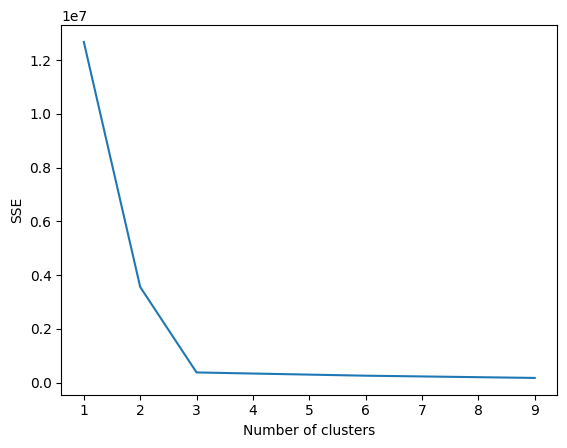

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=len(df), centers=3, random_state=42)

# Set the number of clusters to test
k_range = range(1, 10)

# Set the seed for the k-means++ algorithm
seed = 42

# List to store the SSE values for each k
sse = []

# Loop over k values and fit the k-means model
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=seed)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
import matplotlib.pyplot as plt

plt.plot(k_range, sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### Clustering

In [26]:
from sklearn.cluster import KMeans

# clustering with the optimal number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [27]:
# get group label for each data
labels = kmeans.fit_predict(X)

In [28]:
# Get the number of groups formed
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Jumlah kelompok: ", n_clusters)

Jumlah kelompok:  3


In [29]:
# change the clustering result data into DataFrame format
df_clustered = pd.DataFrame({'comments': df['comments'], 'cluster': labels})

##### Evaluation With Silhouette Coefficient


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [31]:
# generate sample data
kmeans.fit(X)
labels = kmeans.labels_

In [32]:
# calculate silhouette score
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: 0.8412878810299719


In [33]:
#displays clustering results
df['cluster'] = labels

# Display the number of data points in each cluster
print(df.groupby(['cluster']).count())

         comment  stemming  comments  sentiment_score
cluster                                              
0          63233     63233     63233            63233
1          63234     63234     63234            63234
2          63233     63233     63233            63233


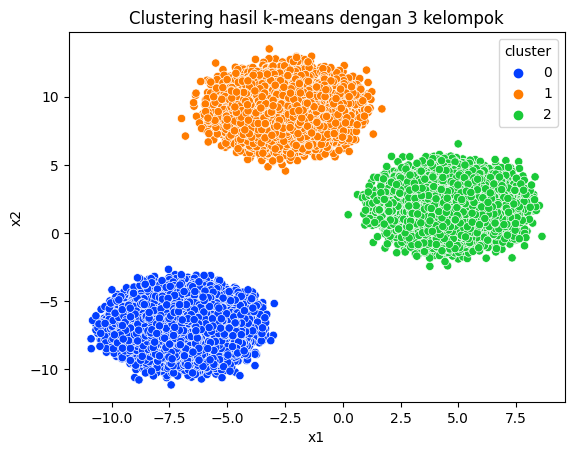

In [34]:
import seaborn as sns

# create a DataFrame for data and group labels
df_cluster = pd.DataFrame(X, columns=['x1', 'x2'])
df_cluster['cluster'] = labels

# plotting using seaborn
sns.scatterplot(x='x1', y='x2', data=df_cluster, hue='cluster', palette='bright')
plt.title(f"Clustering hasil k-means dengan {n_clusters} kelompok")
plt.show()

##### Extract Top 10 Words Based on Base Centroid

In [35]:
from sklearn.metrics.pairwise import euclidean_distances

# calculate the distance between each document and the centroid
distances = euclidean_distances(X, kmeans.cluster_centers_.reshape(n_clusters, -1))

# for each cluster formed, take the top 10 words and identify the sentiment value
for cluster_id in range(n_clusters):
    cluster_words = []
    for doc_id, label in enumerate(labels):
        if label == cluster_id:
            words = df.iloc[doc_id]['comments'].split()
            cluster_words.extend(words)
    top_words = pd.Series(cluster_words).value_counts().head(10)
    top_words_scores = [lexicon.get(word, 0) for word in top_words.index]
    print(f"Cluster {cluster_id} Top 10 words: {', '.join(top_words.index)}")
    print(f"Sentiment Scores: {', '.join(map(str, top_words_scores))}")


Cluster 0 Top 10 words: pak, ganjar, jadi, presiden, indonesia, jalan, bapak, prabowo, sama, pilih
Sentiment Scores: 0, 0, 4, 1, 0, 0, 0, 0, 3, 4
Cluster 1 Top 10 words: pak, ganjar, jadi, presiden, indonesia, jalan, bapak, prabowo, sama, baik
Sentiment Scores: 0, 0, 4, 1, 0, 0, 0, 0, 3, 2
Cluster 2 Top 10 words: pak, ganjar, jadi, presiden, indonesia, bapak, jalan, prabowo, sama, pilih
Sentiment Scores: 0, 0, 4, 1, 0, 0, 0, 0, 3, 4


##### Calculating the Polarity of Each Cluster

In [36]:
# calculate the average polarity of each cluster
cluster_sentiment = []
for i in range(n_clusters):
    cluster = df[df['cluster'] == i]
    sentiment_sum = cluster['sentiment_score'].sum()
    num_docs = len(cluster)
    avg_sentiment = sentiment_sum / num_docs
    cluster_sentiment.append(avg_sentiment)
    print("Cluster ", i, " avg sentiment: ", avg_sentiment)


Cluster  0  avg sentiment:  2.9825565764711466
Cluster  1  avg sentiment:  2.966631875256982
Cluster  2  avg sentiment:  2.9683867600778076


##### Displays Sentiment Results

In [ ]:
# Creates an array of positive, neutral, and negative sentiments
pos_sentiments = np.arange(1, 6)
neu_sentiments = np.array([0])
neg_sentiments = np.arange(-5, 0)

# Create a function to calculate the number of sentiments in each cluster
def count_sentiments(cluster):
    pos_count = len([score for score in cluster if score in pos_sentiments])
    neu_count = len([score for score in cluster if score in neu_sentiments])
    neg_count = len([score for score in cluster if score in neg_sentiments])
    return pos_count, neu_count, neg_count

# Create a list to store the number of positive, neutral and negative sentiments in each cluster
sentiments = []

for i in range(n_clusters):
    cluster = df[df['cluster'] == i]['sentiment_score']
    pos_count, neu_count, neg_count = count_sentiments(cluster)
    sentiments.append((pos_count, neu_count, neg_count))

# Displays the number of positive, neutral and negative sentiments in each cluster
for i, sentiment in enumerate(sentiments):
    print(f"Cluster {i}: {sentiment[0]} sentimen positif, {sentiment[1]} sentimen netral, {sentiment[2]} sentimen negatif")


Cluster 0: 21800 sentimen positif, 15720 sentimen netral, 9465 sentimen negatif
Cluster 1: 21675 sentimen positif, 15891 sentimen netral, 9564 sentimen negatif
Cluster 2: 21958 sentimen positif, 15850 sentimen netral, 9335 sentimen negatif


In [38]:
# Accumulating the total number of positive, negative and neutral sentiments from the entire cluster
total_pos_count = sum([sentiment[0] for sentiment in sentiments])
total_neu_count = sum([sentiment[1] for sentiment in sentiments])
total_neg_count = sum([sentiment[2] for sentiment in sentiments])

# Displays the total number of positive, neutral and negative sentiments from the entire cluster
print(f"Total sentimen positif: {total_pos_count}")
print(f"Total sentimen netral: {total_neu_count}")
print(f"Total sentimen negatif: {total_neg_count}")


Total sentimen positif: 65433
Total sentimen netral: 47461
Total sentimen negatif: 28364


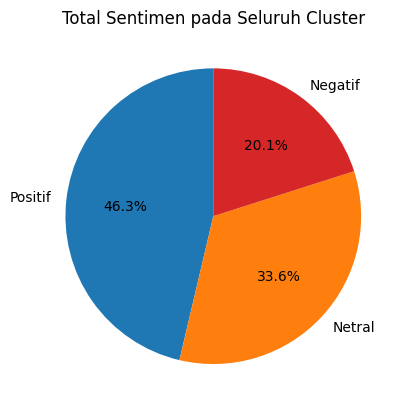

In [39]:
import matplotlib.pyplot as plt

# Prepare data for pie charts
labels = ['Positif', 'Netral', 'Negatif']
sizes = [total_pos_count, total_neu_count, total_neg_count]
colors = ['#1f77b4', '#ff7f0e', '#d62728']

# Make pie charts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
ax.set_title('Total Sentimen pada Seluruh Cluster')

# Displays a pie chart
plt.show()
